# air-quality-analysis

AQI ( Air Quality Index )-----

Kaggle dataset: Air Quality Data in India (2015 - 2020)



In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: deepali3005
Your Kaggle Key: ··········


100%|██████████| 72.9M/72.9M [00:00<00:00, 86.7MB/s]


In [4]:
data_filename = './air-quality-data-in-india/city_day.csv'

##loading and cleaning the data



In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(data_filename)

In [7]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [8]:
df.columns            #column names

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df.info()               #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
df.describe()                   #Statistic of data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']                 #total numeric coulmns
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [12]:
df.isna()                                                                 #null value = true

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum().sort_values(ascending=False)              #missing data     (total null values in each column)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [14]:
missing_percent = round((df.isna().sum().sort_values(ascending=False) / len(df) ) * 100 ,3)          #missing data percentage
missing_percent

Xylene        61.322
PM10          37.723
NH3           34.973
Toluene       27.229
Benzene       19.041
AQI           15.851
AQI_Bucket    15.851
PM2.5         15.570
NOx           14.172
O3            13.620
SO2           13.051
NO2           12.140
NO            12.130
CO             6.972
City           0.000
Date           0.000
dtype: float64

In [15]:
m0= missing_percent[missing_percent != 0]                                 #columns with no missing values is neglected
m0


Xylene        61.322
PM10          37.723
NH3           34.973
Toluene       27.229
Benzene       19.041
AQI           15.851
AQI_Bucket    15.851
PM2.5         15.570
NOx           14.172
O3            13.620
SO2           13.051
NO2           12.140
NO            12.130
CO             6.972
dtype: float64

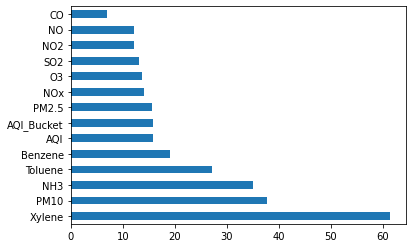

In [16]:
m0.plot(kind='barh')

## EDA (Exploratory Data Analysis)and Visualization


In [17]:
df.Xylene.sum()

35067.0

In [18]:
df.City


0            Ahmedabad
1            Ahmedabad
2            Ahmedabad
3            Ahmedabad
4            Ahmedabad
             ...      
29526    Visakhapatnam
29527    Visakhapatnam
29528    Visakhapatnam
29529    Visakhapatnam
29530    Visakhapatnam
Name: City, Length: 29531, dtype: object

In [19]:
cities=df.City.unique()
#len(cities)
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [22]:
city_by_count = df.City.value_counts()
city_by_count


Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

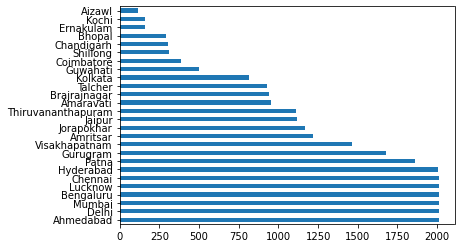

In [23]:
city_by_count.plot(kind='barh')

#### Fill missing values in data
Generate questions